# ML Model Which Predict Marks On The Basis Of Study Hours 

In [44]:
# Import required libraries 
import pandas as pd 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt 

In [45]:
# Load dataset 
df = pd.read_csv("student_scores.csv")

In [46]:
# Quik view of dataset 
df.sample(5)

,Hours,Marks
6,7,75
1,2,40
2,3,50
8,9,85
3,4,55


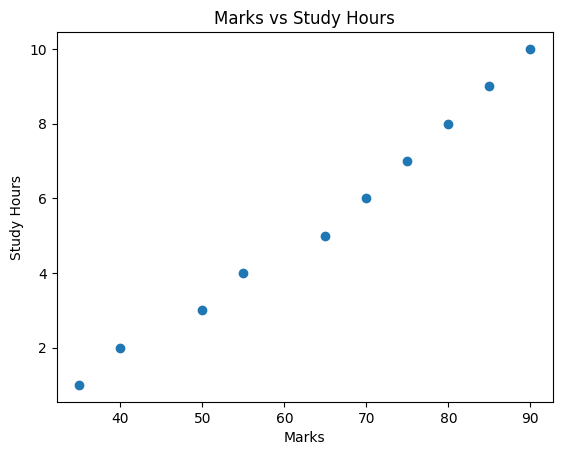

In [47]:
# EDA 
plt.title("Marks vs Study Hours")
plt.xlabel("Marks")
plt.ylabel("Study Hours")
plt.scatter(x=df[['Marks']], y=df[['Hours']])
plt.show()

In [48]:
# Feature Selection 
X = df[['Hours']]
y = df['Marks']

In [49]:
# Split dataset into training and testing set 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [50]:
model = LinearRegression()

In [51]:
# Train model
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [54]:
# Test model performance 
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error on Test Data: {mse:.2f}")                      

Mean Squared Error on Test Data: 7.41


In [55]:
# Take user input & make prediction 
hours = float(input("Enter study hours: "))
# Create a DataFrame with the same column name as training data
input_df = pd.DataFrame({'Hours': [hours]})
predicted_marks = model.predict(input_df)
print(f"Predicted Marks: {predicted_marks[0]:.2f}")

Enter study hours:  9.5


Predicted Marks: 89.48
